In [10]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin, pi, exp
import seaborn as sns

sns.set(rc = {"figure.figsize":(16, 9)})

In [21]:
nzf5_5    = np.loadtxt("build/nzf5_5.txt")
nzf25_5   = np.loadtxt("build/nzf25_5.txt")
nzf5_25   = np.loadtxt("build/nzf5_25.txt")
nzf10_100 = np.loadtxt("build/nzf10_100.txt")
nzf20_400 = np.loadtxt("build/nzf20_400.txt")

In [19]:
def fourier11(t):
    return t * np.exp(-2 * pi**2 * t) 
# * sin(pi * x) * sin(pi * y)

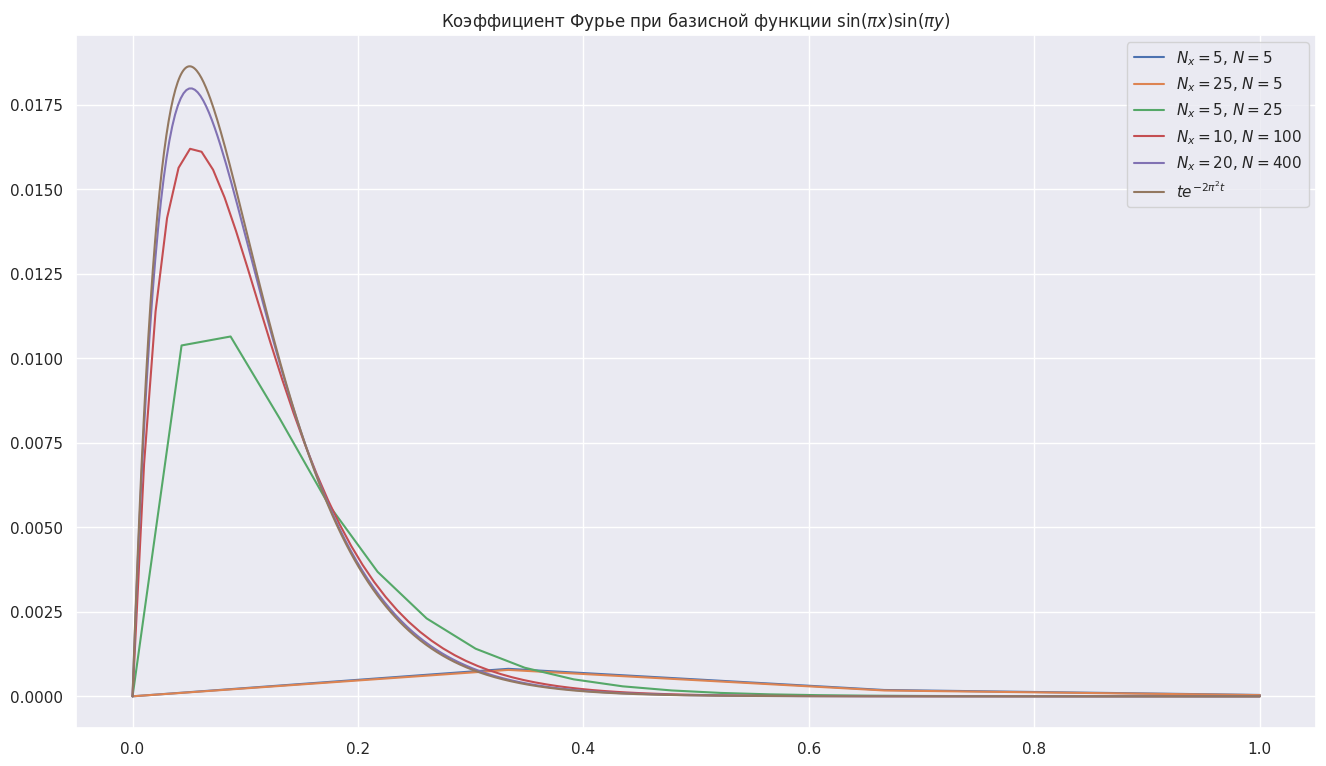

In [27]:
net5_5       = np.linspace(0, 1, len(nzf5_5))
net25_5      = np.linspace(0, 1, len(nzf25_5))
net5_25      = np.linspace(0, 1, len(nzf5_25))
net10_100    = np.linspace(0, 1, len(nzf10_100))
net20_400    = np.linspace(0, 1, len(nzf20_400))
net          = np.linspace(0, 1, 1000)

plt.plot(net5_5   ,    nzf5_5,      label=r"$N_x = 5$, $N = 5$")
plt.plot(net25_5  ,    nzf25_5,    label=r"$N_x = 25$, $N = 5$")
plt.plot(net5_25  ,   nzf5_25,    label=r"$N_x = 5$, $N = 25$")
plt.plot(net10_100,  nzf10_100, label=r"$N_x = 10$, $N = 100$")
plt.plot(net20_400,  nzf20_400, label=r"$N_x = 20$, $N = 400$")
plt.plot(net, fourier11(net), label=r"$t e^{-2 \pi ^2 t}$")
plt.title(r"Коэффициент Фурье при базисной функции $\sin(\pi x) \sin(\pi y)$")
plt.legend()
plt.savefig("nzf_test.pdf")

In [32]:
def arr_delta(arr):
     t = np.linspace(0, 1, len(arr))
     return np.max(fourier11(t) - arr)

In [33]:
h100t100 = np.loadtxt( "build/nzf100_100.txt")
h150t150 = np.loadtxt( "build/nzf150_150.txt")
h200t200 = np.loadtxt( "build/nzf200_200.txt")
h250t250 = np.loadtxt( "build/nzf250_250.txt")

deltas = np.array([arr_delta(h100t100),
                   arr_delta(h150t150),
                   arr_delta(h200t200),
                   arr_delta(h250t250)])


hs = np.array([1./100.,1./150.,1./200., 1./250.])

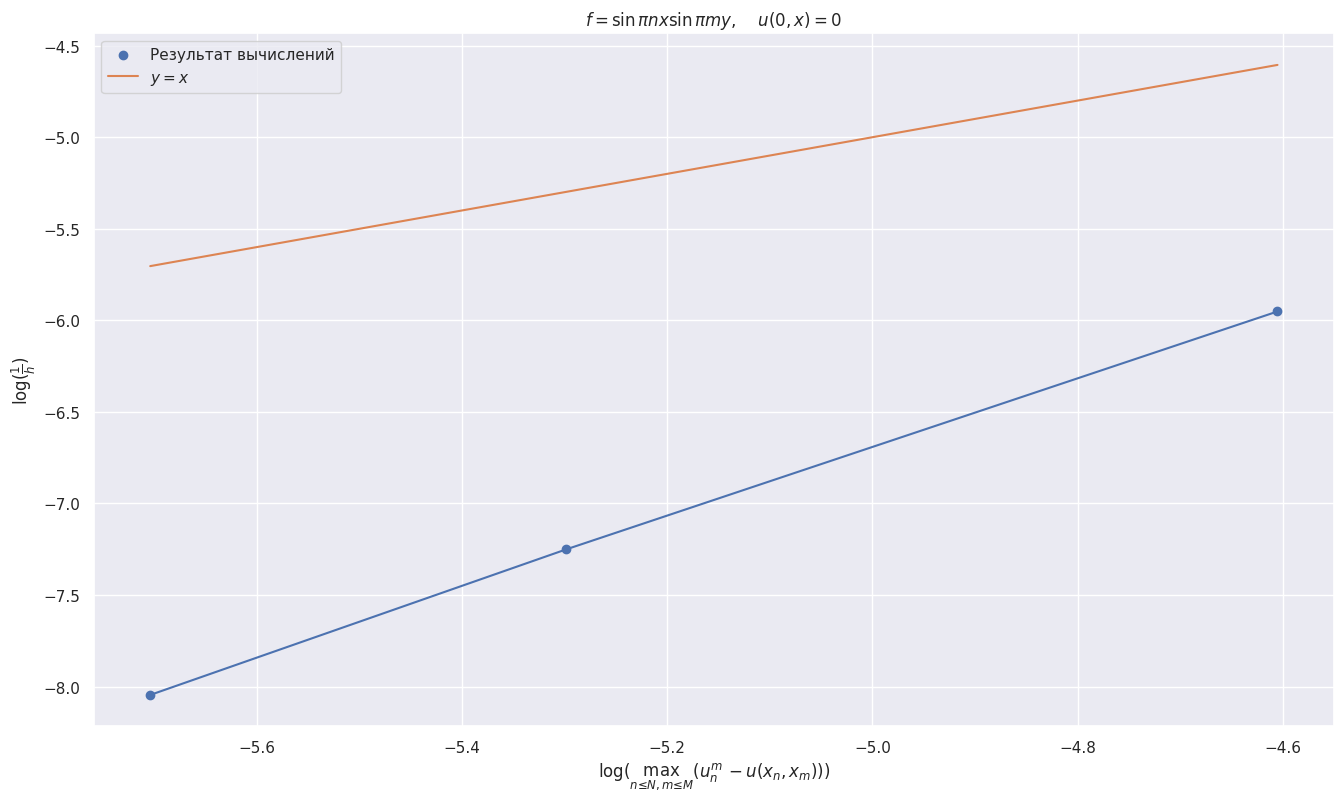

In [39]:
plt.plot(np.log(hs), np.log(deltas))
plt.scatter(np.log(hs), np.log(deltas), label="Результат вычислений")
plt.plot(np.log(hs), np.log(hs), label=r"$y=x$")
plt.title(r"$f = \sin \pi n x \sin \pi m y$, $\quad u(0,x)=0$")
plt.ylabel(r"$\log(\frac{1}{h})$")
plt.xlabel(r"$\log(\max_{n\leq N, m \leq M}(u_n^m - u(x_n, x_m)))$")
plt.legend()
plt.savefig("OrderCon1.pdf")

In [36]:
h10t100 = np.loadtxt( "build/nzf10_100.txt")
h20t400 = np.loadtxt( "build/nzf20_400.txt")
h30t900 = np.loadtxt( "build/nzf30_900.txt")


deltas = np.array([arr_delta(h10t100),
                   arr_delta(h20t400),
                   arr_delta(h30t900)])

ts = np.array([1./10.,1./20.,1./30.])

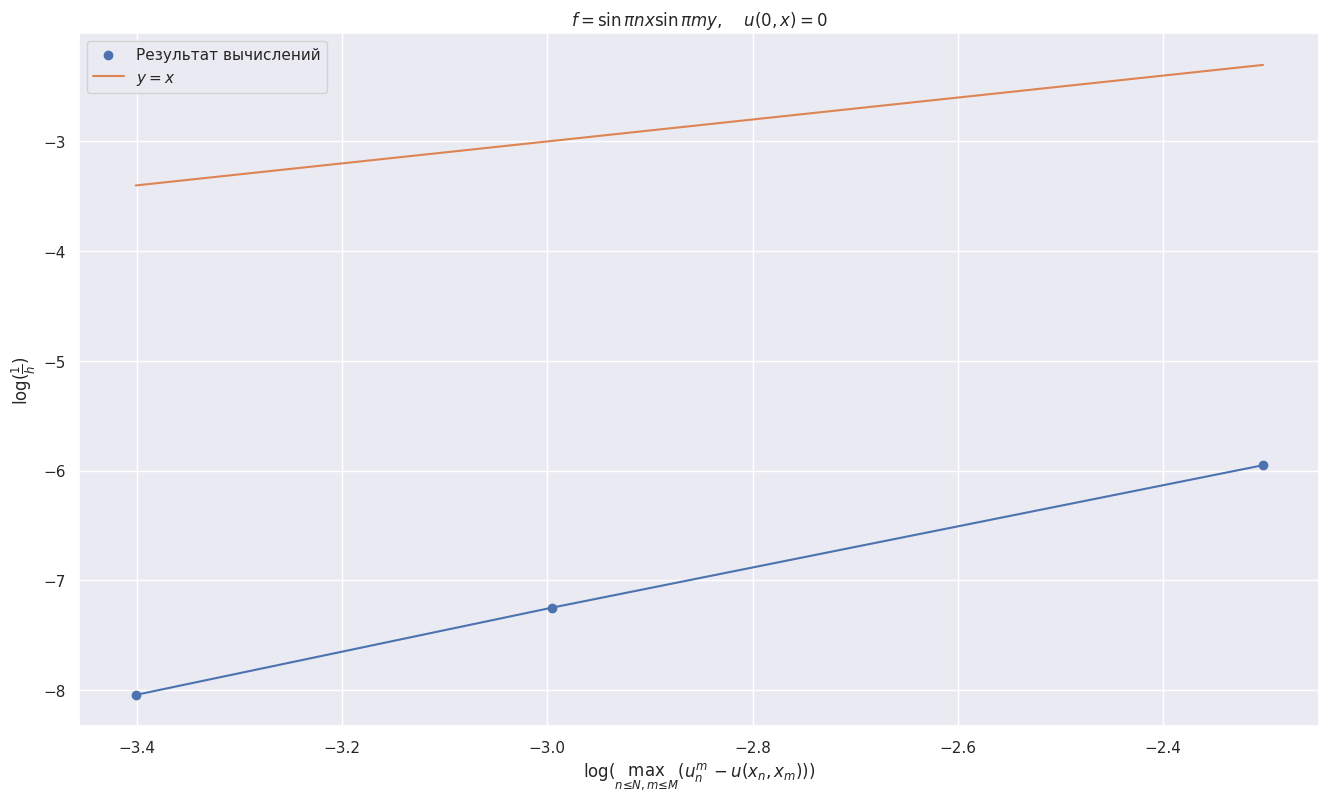

In [40]:
plt.plot(np.log(ts), np.log(deltas))
plt.scatter(np.log(ts), np.log(deltas), label="Результат вычислений")
plt.plot(np.log(ts), np.log(ts), label=r"$y=x$")
plt.title(r"$f = \sin \pi n x \sin \pi m y$, $\quad u(0,x)=0$")
plt.ylabel(r"$\log(\frac{1}{h})$")
plt.xlabel(r"$\log(\max_{n\leq N, m \leq M}(u_n^m - u(x_n, x_m)))$")
plt.legend()
plt.savefig("OrderCon2.pdf")